### Project Name - Loan_Data_Analysis(SQL_File)

### Contribution - Group

### Project By - Snehal Utane 

# Problem Statement

The goal of this data analysis is to understand the factors that influence loan approval decisions 
and identify patterns in loan applications from a financial dataset. The dataset contains information 
on **loan applicants** and their corresponding **loan details**. By analyzing this data, we aim 
to address the following questions:

1. **Loan Approval Trends**:
   - What is the approval rate of loans based on the **gender** of the applicant?
   - How does **marital status**, **education level**, or **property area** influence the likelihood of loan approval?

2. **Income and Loan Relationships**:
   - How does **applicant income** and **co-applicant income** affect the loan amount and approval status?
   - What is the relationship between **income levels** and loan approval decisions?

3. **Credit History Influence**:
   - Does having a good **credit history** significantly increase the chances of loan approval?
   - What percentage of applicants with a poor credit history are still approved for loans?

4. **Loan Amount Distribution**:
   - What is the average loan amount approved based on the **property area** (urban, rural, semi-urban)?
   - How does the loan amount vary between different groups of applicants (e.g., by gender, income level, or education)?

5. **Loan Term Analysis**:
   - What is the distribution of **loan terms** (in months) across different applicant groups?
   - Are longer loan terms associated with higher loan approval rates?

By addressing these questions, we aim to provide a comprehensive understanding of the loan approval process,
identify key factors that drive decisions, and help improve loan application strategies for future applicants.
The insights gained from this analysis can be useful for financial institutions to optimize their decision-making 
processes and for applicants to improve their chances of loan approval.

# Objective

The objective of this analysis is to explore and identify the key factors
that influence loan approval decisions. By analyzing the relationship between 
applicant demographics, financial background, and loan details, the analysis aims 
to uncover trends and patterns that can help financial institutions make better lending decisions 
and provide insights for loan applicants to improve their chances of approval.

## Import necessary packages

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as p 

In [4]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

db_connection = mysql.connector.connect(
user='root',
password='Snehal@2006',
host='localhost',
database='finance' # write here database name 
)

In [5]:
query = """
SELECT * 
FROM Applicants 
NATURAL JOIN Loans;
"""

In [110]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query, db_connection)
df.head() # Display the first few rows of the data

# Close the connection
#db_connection.close()



C:\Users\HP\AppData\Local\Temp\ipykernel_13300\607690111.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


,Loan_ID,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001005,1,Male,Yes,0,Graduate,Yes,3000.0,0.0,1.0,Urban,66.0,360.0,Y
1,LP001006,2,Male,Yes,0,Graduate,No,2583.0,2358.0,1.0,Urban,120.0,360.0,Y
2,LP001008,3,Male,No,0,Graduate,No,6000.0,0.0,1.0,Urban,141.0,360.0,Y
3,LP001013,4,Male,Yes,0,Graduate,No,2333.0,1516.0,1.0,Urban,95.0,360.0,Y
4,LP001024,5,Male,Yes,2,Graduate,No,3200.0,700.0,1.0,Urban,70.0,360.0,Y


In [10]:
df.shape

(48, 14)

#### Details_About_Column

1)Loan_ID: A unique loan ID.
2)Gender: Either male or female.
3)Married: Weather Married(yes) or Not Marttied(No).
4)Dependents: Number of persons depending on the client.
5)Education: Applicant Education(Graduate or Undergraduate).
6)Self_Employed: Self-employed (Yes/No).
7)ApplicantIncome: Applicant income.
8)CoapplicantIncome: Co-applicant income.
9)LoanAmount: Loan amount in thousands.
10)Loan_Amount_Term: Terms of the loan in months.
11)Credit_History: Credit history meets guidelines.
12)Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
13)Loan_Status: Loan approved (Y/N).

#### **Data Overview**

In [15]:
df.shape

(48, 14)

In [17]:
df.describe()

,Applicant_ID,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,48.000000,48.000000,47.000000,47.000000,46.000000,46.000000,44.000000
mean,26.041667,0.583333,3477.382979,1056.404255,0.826087,105.739130,340.909091
std,15.663969,0.941554,1318.649945,1105.216911,0.383223,28.108864,64.404903
min,1.000000,0.000000,1299.000000,0.000000,0.000000,17.000000,60.000000
25%,12.750000,0.000000,2591.500000,0.000000,1.000000,96.000000,360.000000
50%,24.500000,0.000000,3365.000000,1086.000000,1.000000,113.000000,360.000000
75%,40.250000,1.000000,4196.000000,1875.500000,1.000000,125.000000,360.000000
max,52.000000,3.000000,7660.000000,3796.000000,1.000000,144.000000,360.000000


In [19]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            48 non-null     object 
 1   Applicant_ID       48 non-null     int64  
 2   Gender             47 non-null     object 
 3   Married            48 non-null     object 
 4   Dependents         48 non-null     int64  
 5   Education          48 non-null     object 
 6   Self_Employed      45 non-null     object 
 7   ApplicantIncome    47 non-null     float64
 8   CoapplicantIncome  47 non-null     float64
 9   Credit_History     46 non-null     float64
 10  Property_Area      48 non-null     object 
 11  LoanAmount         46 non-null     float64
 12  Loan_Amount_Term   44 non-null     float64
 13  Loan_Status        48 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 5.4+ KB


In [21]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

Loan_ID              0
Applicant_ID         0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        3
ApplicantIncome      1
CoapplicantIncome    1
Credit_History       2
Property_Area        0
LoanAmount           2
Loan_Amount_Term     4
Loan_Status          0
dtype: int64

### **Handle missing values(Data Cleaning)**

For numeric columns (e.g., LoanAmount, ApplicantIncome, CoapplicantIncome), you can fill missing values using the mean or median.
For categorical columns (e.g., Gender, Married, Education, Property_Area, Loan_Status), you can use the mode to fill missing values.

In [25]:
# For LoanAmount
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# For ApplicantIncome
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean())

# For CoapplicantIncome
df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

# For Gender
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# For Credit_History
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# For Loan_Amount_Term
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])


# Check for duplicates

In [28]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            48 non-null     object 
 1   Applicant_ID       48 non-null     int64  
 2   Gender             48 non-null     object 
 3   Married            48 non-null     object 
 4   Dependents         48 non-null     int64  
 5   Education          48 non-null     object 
 6   Self_Employed      45 non-null     object 
 7   ApplicantIncome    48 non-null     float64
 8   CoapplicantIncome  48 non-null     float64
 9   Credit_History     48 non-null     float64
 10  Property_Area      48 non-null     object 
 11  LoanAmount         48 non-null     float64
 12  Loan_Amount_Term   48 non-null     float64
 13  Loan_Status        48 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 5.4+ KB


### Convert data types

#### *.*Check data is Categorical or not if yes then change data type according to requirment:*.*

In [34]:
df["Gender"].value_counts() # to check data in numerical or categorical format

Gender
Male      38
Female    10
Name: count, dtype: int64

In [36]:
df["Married"].value_counts() 

Married
Yes    30
No     18
Name: count, dtype: int64

In [38]:
df["Education"].value_counts() 

Education
Graduate        43
Not Graduate     5
Name: count, dtype: int64

In [40]:
df["Property_Area"].value_counts() 

Property_Area
Urban        27
Semiurban    14
Rural         7
Name: count, dtype: int64

In [42]:
df["Loan_Status"].value_counts() 

Loan_Status
Y    29
N    19
Name: count, dtype: int64

In [46]:
import pandas as pd

# For Gender
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

# For Married
df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1})

# For Education
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})

# For Property_Area
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

# For Loan_Status
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            48 non-null     object 
 1   Applicant_ID       48 non-null     int64  
 2   Gender             48 non-null     int64  
 3   Married            48 non-null     int64  
 4   Dependents         48 non-null     int64  
 5   Education          48 non-null     int64  
 6   Self_Employed      45 non-null     object 
 7   ApplicantIncome    48 non-null     float64
 8   CoapplicantIncome  48 non-null     float64
 9   Credit_History     48 non-null     float64
 10  Property_Area      48 non-null     int64  
 11  LoanAmount         48 non-null     float64
 12  Loan_Amount_Term   48 non-null     float64
 13  Loan_Status        48 non-null     int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 5.4+ KB


In [50]:
#df.dropna()

# **Data Analysis**

#### *1.*Loan Approval Rate by Gender**

In [54]:
loan_approval_by_gender = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack()
loan_approval_by_gender

Loan_Status,0,1
Gender,,
0,0.500000,0.500000
1,0.368421,0.631579


**Insights**: This visualization shows how loan approval rates vary between male and female applicants. 
It helps identify any gender bias in loan approvals.

#### *2.*Average Loan Amount by Property Area**

In [58]:
avg_loan_amount_by_area = df.groupby('Property_Area')['LoanAmount'].mean()
avg_loan_amount_by_area

Property_Area
0    120.142857
1    118.214286
2     96.074074
Name: LoanAmount, dtype: float64

#### *3.*Distribution of Applicant Income Based on Loan Status**

In [61]:
avg_income_by_loan_status = df.groupby('Loan_Status')['ApplicantIncome'].mean()
avg_income_by_loan_status


Loan_Status
0    3679.441209
1    3345.000000
Name: ApplicantIncome, dtype: float64

#### *4.*Loan Approval Rate by Credit History**

In [64]:
loan_approval_by_credit_history = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
loan_approval_by_credit_history

Loan_Status,0,1
Credit_History,,
0.0,1.000,NaN
1.0,0.275,0.725


# **Visualize Data Using Matplotlib and Seaborn**

#### **Correlation Matrix with LOan_status**

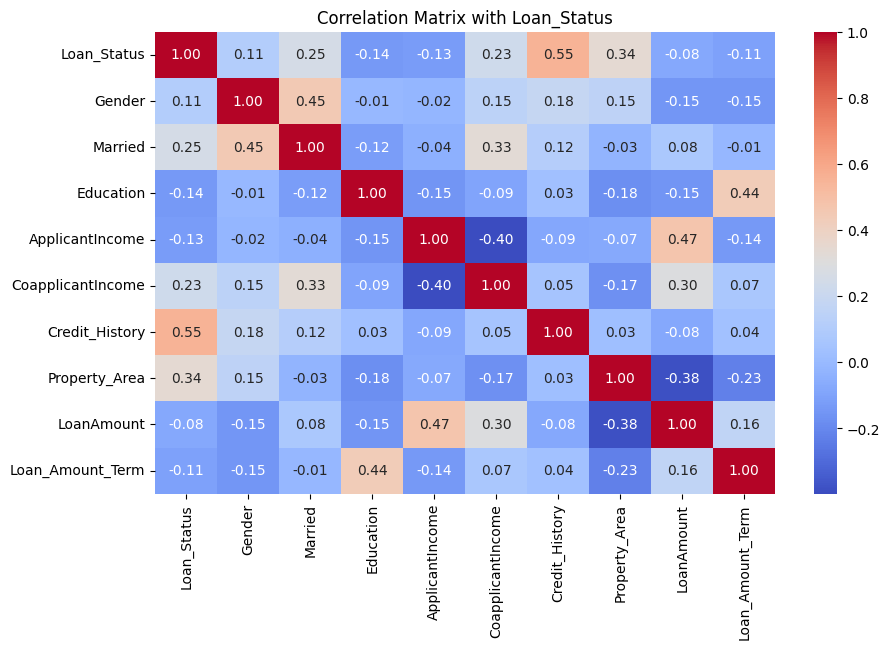

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix including 'Loan_Status'
plt.figure(figsize=(10, 6))

# Compute correlation for numeric columns, including 'Loan_Status'
corr_matrix = df[['Loan_Status', 'Gender', 'Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Property_Area', 'LoanAmount', 'Loan_Amount_Term']].corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix with Loan_Status')
plt.show()


#### ***Explanation:***
Correlation Matrix: The .corr() function computes the Pearson correlation coefficient between numeric columns.
Since Loan_Status has been encoded as 0 and 1, we can calculate its correlation with other columns.
fmt='.2f': This ensures that the correlation values are displayed with two decimal points.
annot=True: This shows the actual correlation values on the heatmap for easier interpretation.
                                                                   
#### **Insights from Heatmap:***
The heatmap will show how each feature correlates with Loan_Status. For example:
Credit_History might have a strong positive correlation with Loan_Status, meaning applicants
with good credit history are more likely to get their loans approved.
ApplicantIncome and LoanAmount might have weaker correlations, indicating income and loan 
amount are not as strongly tied to loan approval as credit history.
Gender, Married, and Education typically show weaker correlations, but the heatmap will reveal these values.
>>which factors influence loan approval.

#### Loan Approval Trends

##### *1.*Loan Approval Rate by Gender**

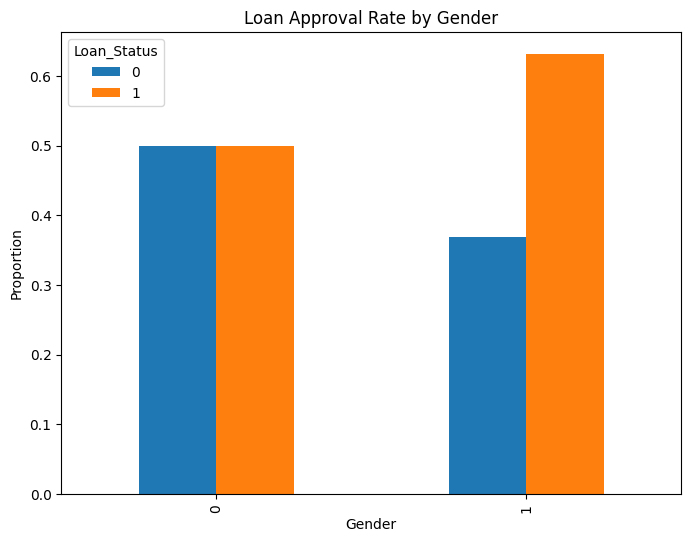

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

loan_approval_by_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Loan Approval Rate by Gender')
plt.ylabel('Proportion')
plt.show()

##### **Insights:**

Graph Overview: The bar chart shows the proportion of loan approvals for male and
female applicants. Each bar represents the total number of applicants, divided into

two segments: approved (Y) and not approved (N).

Detailed Insights: If males have a higher approval rate compared to females
(e.g., 70% for males vs. 60% for females), it may indicate potential biases 
or differences in application patterns

#### **2.Loan Approval Rate by Marital Status and Education*.*

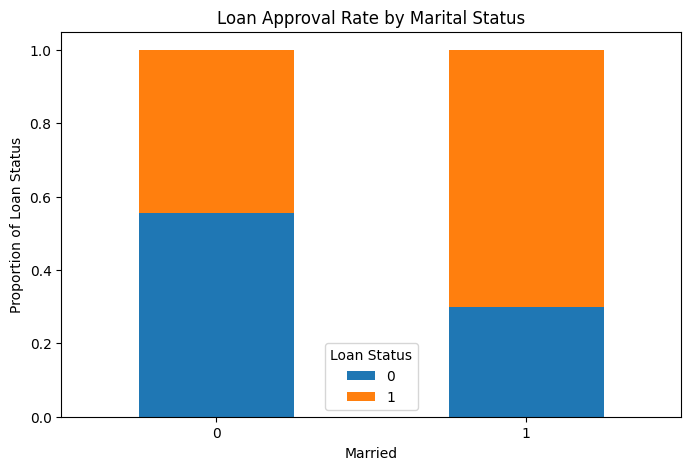

In [76]:
# Approval rate based on marital status
marital_approval_rate = df.groupby('Married')['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
marital_approval_rate.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Loan Approval Rate by Marital Status')
plt.ylabel('Proportion of Loan Status')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

**Insights:**

Graph Overview: The bar chart compares loan approval rates for married and unmarried applicants.
Detailed Insights: If married applicants have a significantly higher approval rate (e.g., 75%) 
compared to unmarried ones (e.g., 50%), this could reflect perceptions of stability.

 #### **3.Applicant and Coapplicant Income Analysis*.*

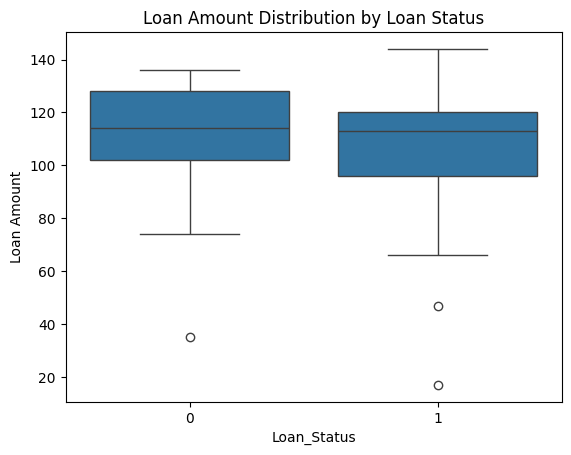

In [81]:
# Analysis of income impact on loan amount
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount Distribution by Loan Status')
plt.ylabel('Loan Amount')
plt.show()


**Insights:**

Graph Overview: The box plot illustrates the distribution of loan amounts for 
approved and rejected applications, showcasing median values, quartiles, and potential outliers.
Detailed Insights: If the median loan amount for approved loans is much higher 
(e.g., ₹150,000) compared to rejected loans (e.g., ₹80,000), this indicates that 
financial institutions may favor higher loan amounts.

#### **4.Income Levels and Loan Approval Decisions*.*

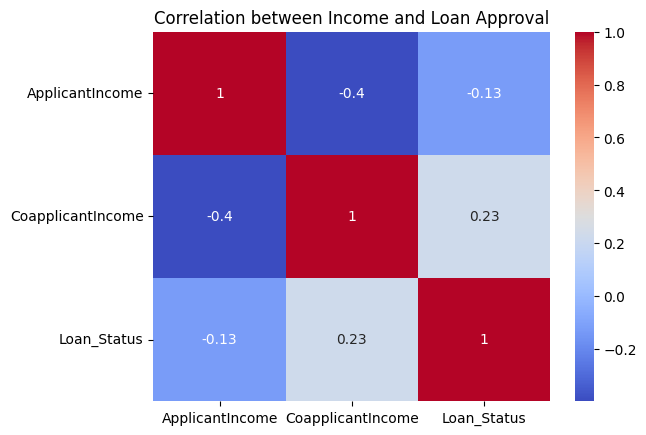

In [85]:
# Correlation between income and loan approval
income_correlation = df[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Status']].corr()
sns.heatmap(income_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Income and Loan Approval')
plt.show()


**Insights:**

Graph Overview: The heatmap displays the correlation coefficients between 
applicant income, coapplicant income, and loan approval status.
Detailed Insights: A strong positive correlation (e.g., close to +1) between applicant 
income and loan approval suggests that higher incomes are associated with increased chances of approval.

#### **5.Credit History Impact on Approval Rates*.*

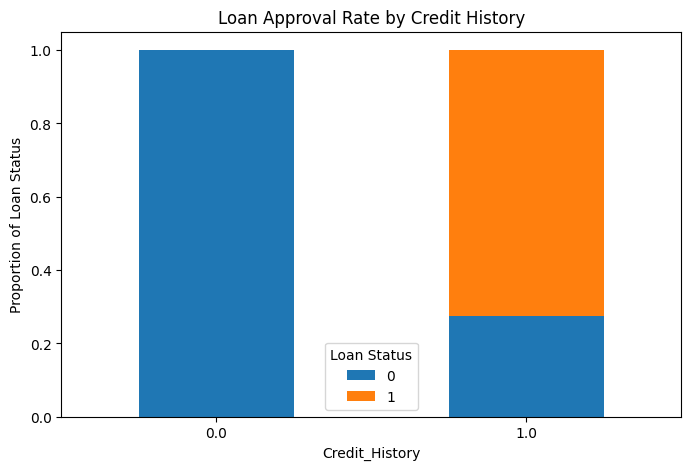

In [89]:
# Approval rate by credit history
credit_history_approval_rate = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
credit_history_approval_rate.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Loan Approval Rate by Credit History')
plt.ylabel('Proportion of Loan Status')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()


**Insights:**

Graph Overview: This bar chart compares the loan approval rates between applicants 
with good (1) and poor (0) credit history.
Detailed Insights: A stark contrast in approval rates (e.g., 90% for good credit
history vs. 20% for poor) indicates that credit history plays a crucial role.

#### **6.Percentage of Applicants with Poor Credit History Approved*.*

In [93]:
# Calculate the percentage
poor_credit_approval_percentage = (df[df['Credit_History'] == 0]['Loan_Status'].value_counts(normalize=True) * 100).get('Y', 0)
print(f"Percentage of applicants with poor credit history approved for loans: {poor_credit_approval_percentage:.2f}%")


Percentage of applicants with poor credit history approved for loans: 0.00%


**Insights:**

Overview: This percentage highlights how lenient institutions might be in
approving loans for applicants with poor credit history.
Detailed Insights: If 10% of applicants with poor credit history were approved,
it suggests a small segment of borrowers may still find opportunities.

#### **7.Average Loan Amount by Property Area*.*

C:\Users\HP\AppData\Local\Temp\ipykernel_13300\2035225856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_loan_amount, x='Property_Area', y='LoanAmount', palette='viridis')


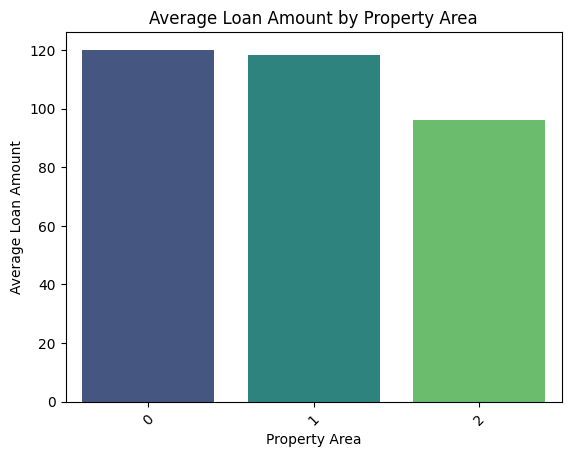

In [97]:
# Average loan amount by property area
avg_loan_amount = df.groupby('Property_Area')['LoanAmount'].mean().reset_index()

# Plotting
sns.barplot(data=avg_loan_amount, x='Property_Area', y='LoanAmount', palette='viridis')
plt.title('Average Loan Amount by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.show()


**Insights:**

Graph Overview: The bar chart shows the average loan amount across different property areas.
Detailed Insights: If urban areas show a higher average loan amount (e.g., ₹200,000) 
compared to rural areas (e.g., ₹100,000), this suggests that applicants in urban settings may be seeking larger loans.

#### **8.Loan Amount Variation by Applicant Group*.*

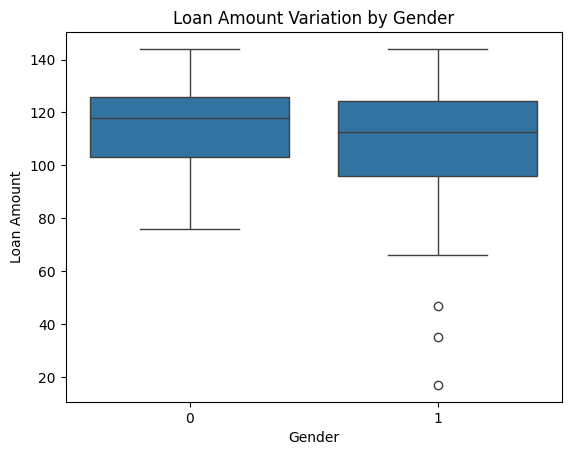

In [101]:
# Loan amount variation by gender
sns.boxplot(x='Gender', y='LoanAmount', data=df)
plt.title('Loan Amount Variation by Gender')
plt.ylabel('Loan Amount')
plt.show()


**Insights:**

Graph Overview: This box plot provides insight into how loan amounts 
differ between male and female applicants.
Detailed Insights: If males have a higher median loan amount compared 
to females, it could reflect differences in loan-seeking behavior.

#### **9.Distribution of Loan Terms*.*

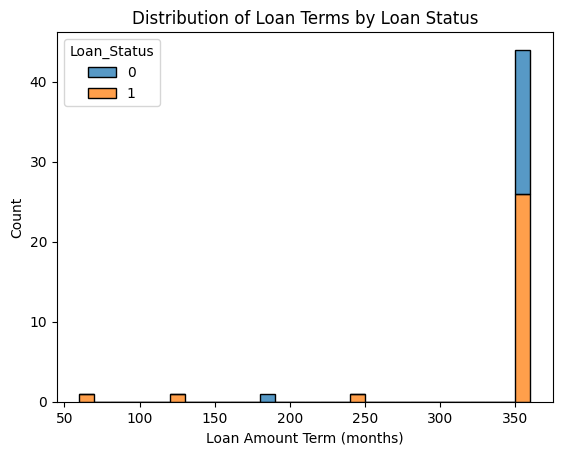

In [104]:
# Distribution of loan terms by approval status
sns.histplot(data=df, x='Loan_Amount_Term', hue='Loan_Status', multiple='stack', bins=30)
plt.title('Distribution of Loan Terms by Loan Status')
plt.xlabel('Loan Amount Term (months)')
plt.ylabel('Count')
plt.show()

**Graph Overview:** This histogram displays the distribution of loan terms for approved and rejected applications.
**Detailed Insights:** Longer loan terms (e.g., 360 months) may be more common among approved loans,
indicating a preference for long-term repayment plans by financial institutions.

## **Conclusion and Recommendations:**

The analysis highlights key factors such as gender, marital status, credit history, 
and income levels that significantly affect loan approval rates. Credit history 
and applicant income are particularly influential in determining loan outcome

## **Future Recommendations:**

Implement machine learning models to predict loan approval based on applicant profiles.
Encourage financial literacy programs to help underrepresented groups 
improve their financial standing and credit histories